# **CNN assignment**(Do read the note at the end)

**Q.1** Import all required modules

In [2]:
# Used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)



*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [4]:
dataset_path = "/content/drive/MyDrive/data"

In [5]:
data = image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',  # Automatically infer labels from directory structure
    label_mode='int',  # Can be 'int', 'categorical', or 'binary'
    batch_size=32,  # Adjust batch size as needed
    image_size=(256, 256),  # Resize images to this size
    shuffle=True,  # Shuffle the data
    seed=42  # Set seed for reproducibility
)

Found 1658 files belonging to 4 classes.


In [6]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [7]:
data_iterator=data.as_numpy_iterator()

In [8]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

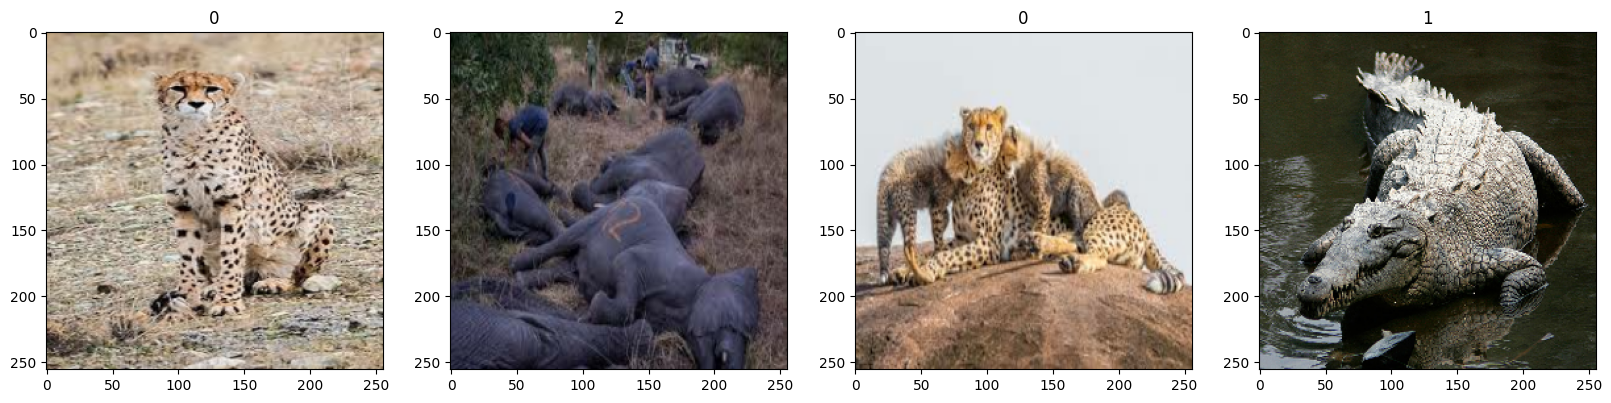

In [9]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [10]:
data=data.map(lambda image, label: (tf.cast(image, tf.float32) / 255.0, label)) #Your code here)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [11]:
#Your code here

# Counting the total number of batches
total_size = sum(1 for _ in data)

train_ratio = 0.8  # 80% for training
test_ratio = 0.2   # 20% for testing


train_size = int(total_size * train_ratio)
test_size = int(total_size * test_ratio)


# Creating the training dataset using take 
train_dataset = data.take(train_size)

# Creating the test dataset by skipping the training batches
test_dataset = data.skip(train_size).take(test_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [12]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])


**Q.6** Compile your model

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  #'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)


**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [14]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10  # Lower number of epochs due to large dataset 
)

Epoch 1/10
41/41 [==============================] - 33s 576ms/step - loss: 1.9098 - accuracy: 0.3247 - val_loss: 1.3555 - val_accuracy: 0.3031
Epoch 2/10
41/41 [==============================] - 26s 612ms/step - loss: 1.2836 - accuracy: 0.4261 - val_loss: 1.2175 - val_accuracy: 0.4250
Epoch 3/10
41/41 [==============================] - 33s 786ms/step - loss: 1.0952 - accuracy: 0.5381 - val_loss: 0.9600 - val_accuracy: 0.6094
Epoch 4/10
41/41 [==============================] - 26s 595ms/step - loss: 0.8083 - accuracy: 0.6784 - val_loss: 0.8114 - val_accuracy: 0.6656
Epoch 5/10
41/41 [==============================] - 25s 589ms/step - loss: 0.5509 - accuracy: 0.7843 - val_loss: 0.5747 - val_accuracy: 0.7625
Epoch 6/10
41/41 [==============================] - 25s 592ms/step - loss: 0.4231 - accuracy: 0.8514 - val_loss: 0.5513 - val_accuracy: 0.7906
Epoch 7/10
41/41 [==============================] - 33s 776ms/step - loss: 0.2939 - accuracy: 0.8979 - val_loss: 0.3944 - val_accuracy: 0.8750

**Q.8** Test your code with test set

In [15]:
loss,accuracy=model.evaluate(test_dataset)

10/10 [==============================] - 12s 69ms/step - loss: 0.4386 - accuracy: 0.8781


In [16]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.878125011920929


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**